Objective: Dimensionality Reduction through Principal Component Analysis on the Wine data Sset.

Data Set: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.dataLinks to an external site.

Data details: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/Links to an external site.

Steps:

PCA involves following broad level steps: 
1. Standardize the d-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Select k eigenvectors that correspond to the k largest eigenvalues where k is the dimensionality of the new feature subspace
 ( k≤d ).
5. Construct a projection matrix W from the "top" k eigenvectors.
6. Transform the d-dimensional input dataset x using the projection matrix W to obtain the new k-dimensional feature subspace

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.stats import zscore

from sklearn.linear_model import LogisticRegression

# calculate accuracy measures and confusion matrix
from sklearn import metrics
pd.set_option('display.max_columns', None)

In [151]:
wine_df=pd.read_csv('wine.data',header=None)

In [152]:
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [153]:
col = ['class','alcohol','malic_acid','ash','alcalinity_ash','magnesium','tot_phenols','flavanoids','non_flav_phenols','proanthocyanins',
      'color_intensity','hue','OD280/OD315','proline']


In [154]:
wine_df.columns=col

In [155]:
wine_df.head()

,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,tot_phenols,flavanoids,non_flav_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [156]:
wine_df.columns

Index(['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_ash', 'magnesium',
       'tot_phenols', 'flavanoids', 'non_flav_phenols', 'proanthocyanins',
       'color_intensity', 'hue', 'OD280/OD315', 'proline'],
      dtype='object')

In [157]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class               178 non-null int64
alcohol             178 non-null float64
malic_acid          178 non-null float64
ash                 178 non-null float64
alcalinity_ash      178 non-null float64
magnesium           178 non-null int64
tot_phenols         178 non-null float64
flavanoids          178 non-null float64
non_flav_phenols    178 non-null float64
proanthocyanins     178 non-null float64
color_intensity     178 non-null float64
hue                 178 non-null float64
OD280/OD315         178 non-null float64
proline             178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [158]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
tot_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
non_flav_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [159]:
wine_df['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [160]:
wine_df.shape

(178, 14)

In [161]:
#Checking where do we have null values
wine_df.isnull().sum()

class               0
alcohol             0
malic_acid          0
ash                 0
alcalinity_ash      0
magnesium           0
tot_phenols         0
flavanoids          0
non_flav_phenols    0
proanthocyanins     0
color_intensity     0
hue                 0
OD280/OD315         0
proline             0
dtype: int64

In [162]:
wine_df['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

### 1.Standardize the d-dimensional dataset.

In [163]:
# separate the class feature
X = wine_df.iloc[:,1:]

y = wine_df.iloc[:,0]


In [164]:
X.head(2)

,alcohol,malic_acid,ash,alcalinity_ash,magnesium,tot_phenols,flavanoids,non_flav_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [165]:
y.head(2)

0    1
1    1
Name: class, dtype: int64

In [166]:
# Standardize feature space to have mean 0 and variance 1
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)
X_std.shape

(178, 13)

In [167]:
print(type(X_std))
print(X_std)

<class 'pandas.core.frame.DataFrame'>
      alcohol  malic_acid       ash  alcalinity_ash  magnesium  tot_phenols  \
0    1.518613   -0.562250  0.232053       -1.169593   1.913905     0.808997   
1    0.246290   -0.499413 -0.827996       -2.490847   0.018145     0.568648   
2    0.196879    0.021231  1.109334       -0.268738   0.088358     0.808997   
3    1.691550   -0.346811  0.487926       -0.809251   0.930918     2.491446   
4    0.295700    0.227694  1.840403        0.451946   1.281985     0.808997   
5    1.481555   -0.517367  0.305159       -1.289707   0.860705     1.562093   
6    1.716255   -0.418624  0.305159       -1.469878  -0.262708     0.328298   
7    1.308617   -0.167278  0.890014       -0.569023   1.492625     0.488531   
8    2.259772   -0.625086 -0.718336       -1.650049  -0.192495     0.808997   
9    1.061565   -0.885409 -0.352802       -1.049479  -0.122282     1.097417   
10   1.358028   -0.158301 -0.243142       -0.448909   0.369212     1.049347   
11   1.382733 

In [168]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation.
# We will create the PCA dimensions on this distribution. 
##sc = StandardScaler()
##X_std =  sc.fit_transform(X) 

### 2. Construct the covariance matrix.

In [169]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 

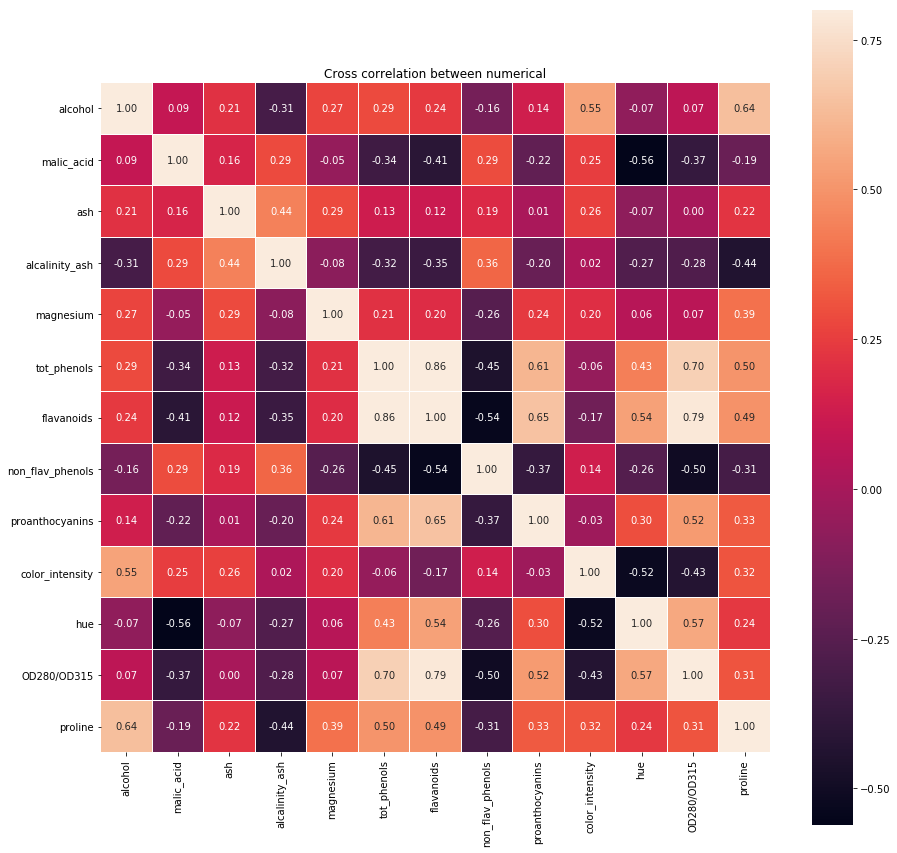

In [170]:
import seaborn as sns
plt.figure(figsize=(15, 15))
ax = sns.heatmap(X_std.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()

As per the covariance metrics we can see significant amount of covariance between:  
Alchol and proline ~ 0.64  
Flavanoids and OD280 ~ 0.80  
Flavanoids and Total_phenols ~ 0.86  
Likewise you can see there is significant amount of covariances betweet many metrics which is hard to callout here

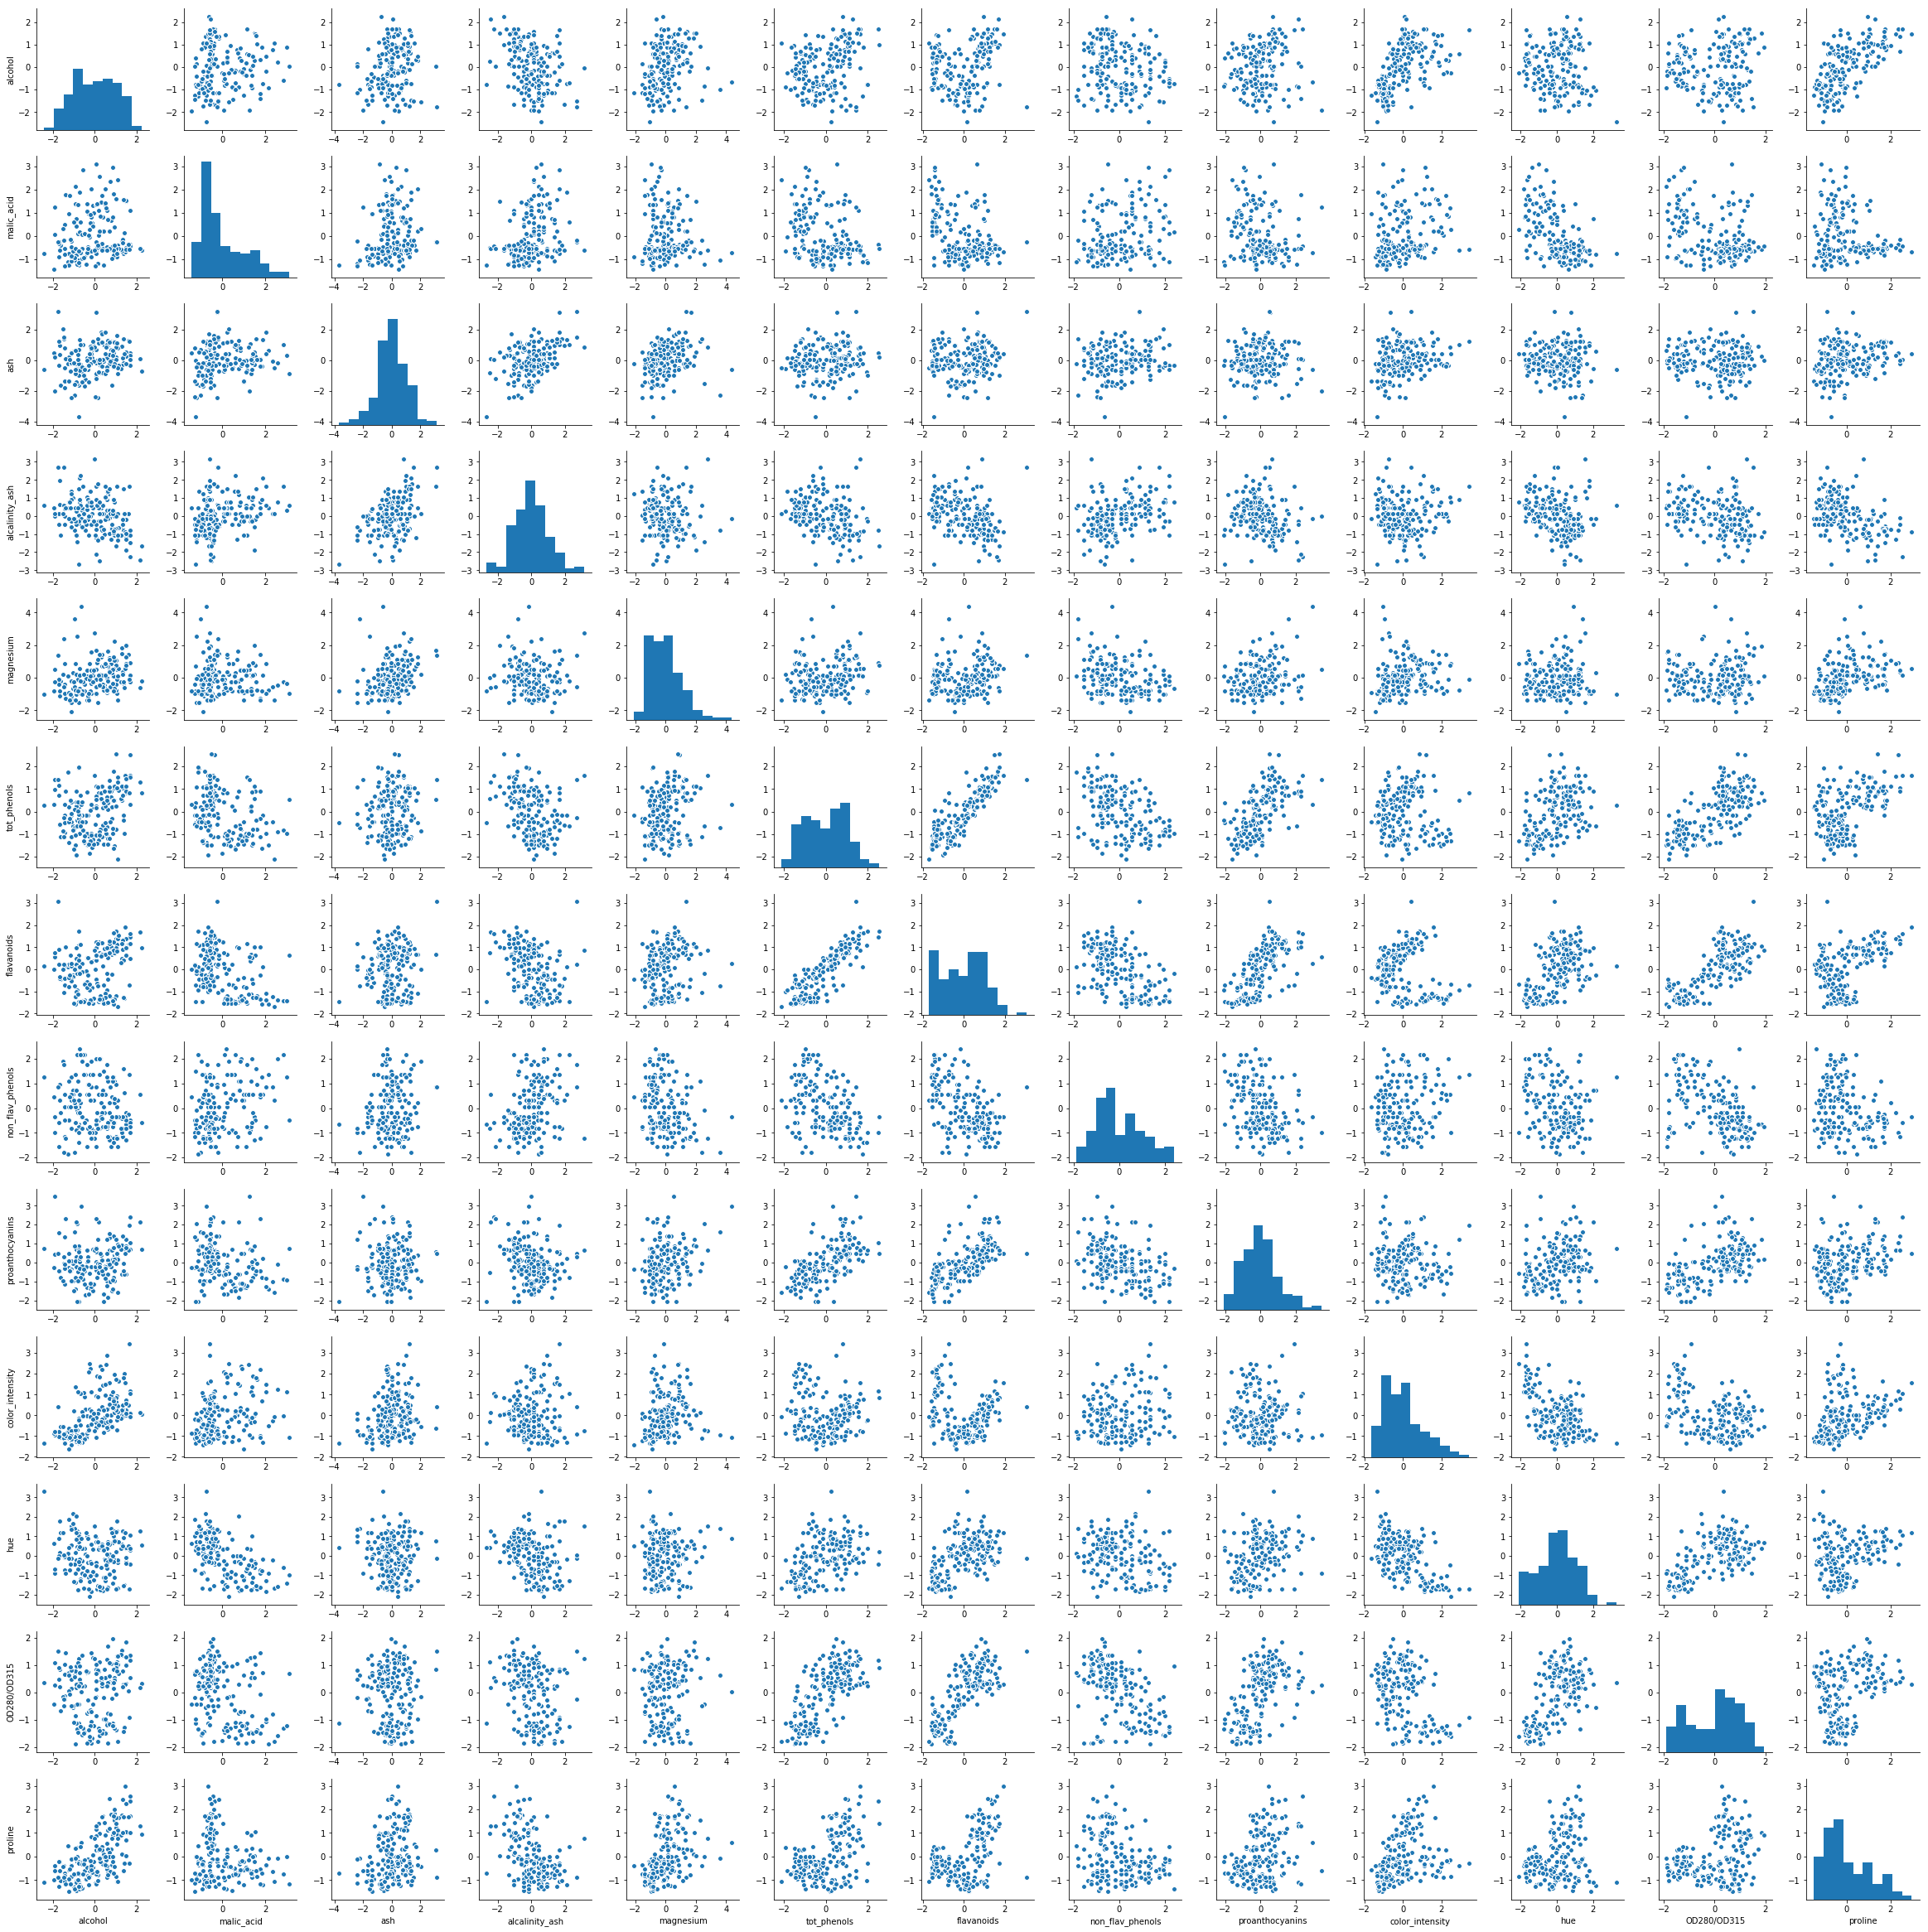

In [171]:
# Pairplot using sns

sns.pairplot(X_std)

### 3. Decompose the covariance matrix into its eigenvectors and eigenvalues.

In [172]:
# Obtain eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 8x8 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 8x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)


Eigenvectors of Cov(X): 
[[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951 -0.14617896  0.19806835 -0.14931841 -0.0841223
   0.02792498  0.46390791 -0.40593409 -0.30388245 -0.28603452  0.30434119
  -0.32013135

In [173]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(4.732436977583594, array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
       -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
       -0.29671456, -0.37616741, -0.28675223])), (2.511080929645123, array([ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
        0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
       -0.27923515, -0.16449619,  0.36490283])), (1.4542418678464695, array([ 0.20738262, -0.08901289, -0.6262239 , -0.61208035, -0.13075693,
       -0.14617896, -0.1506819 , -0.17036816, -0.14945431,  0.13730621,
       -0.08522192, -0.16600459,  0.12674592])), (0.924165866824875, array([-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
        0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
       -0.42777141,  0.18412074, -0.23207086])), (0.8580486765371109, array([-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
       -0.14931841, -0.10902584, -0.50070298,  0.1368

###  4. Select k eigenvectors that correspond to the k largest eigenvalues where k is the dimensionality of the new feature subspace ( k≤d ).

In [174]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]

In [175]:
# an array of variance explained by each eigen vector... there will be 8 entries as there are 13 eigen vectors)
var_explained

[0.3619884809992633,
 0.19207490257008913,
 0.11123630536249993,
 0.07069030182714031,
 0.06563293679648594,
 0.049358233192225674,
 0.04238679322623323,
 0.02680748948378866,
 0.022221534047897146,
 0.01930019093944078,
 0.017368356899899184,
 0.012982325756042131,
 0.007952148898994515]

In [176]:
# an array of cumulative variance. There will be 13 entries with 13 th entry cumulative reaching almost 100%

cum_var_exp = np.cumsum(var_explained) 

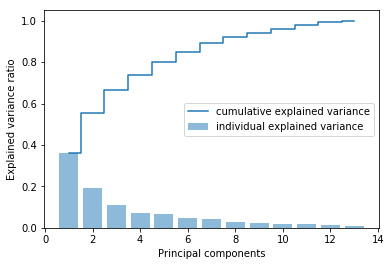

In [177]:
plt.bar(range(1,14), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()



As per the above graph,
#the first eigen value is capturing 39% of the covariance
#frist and second combined are capturing 59% of the covariance
#first, second and third are capturing ~72%
#first six are capturing ~96% of the covariance hence it makes sense to keep K as 6

### 5. Construct a projection matrix W from the "top" k eigenvectors

##### it is basically just a matrix of our concatenated top k eigenvectors.  
Here, we are reducing the 13-dimensional feature space to a 6-dimensional feature subspace, by choosing the “top 6” eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W.

In [178]:
# Step 4: Project data onto lesser dimensions

P_reduce = np.array(eigvectors_sorted[0:6])   # Using all principal components

### 6. Transform the d-dimensional input dataset x using the projection matrix W to obtain the new k-dimensional feature subspace

In [179]:
### we can obtain the compressed dataset by: X of PCA=XW
W = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions
X_std.shape, P_reduce.shape, W.shape

((178, 13), (6, 13), (178, 6))

In [180]:
print(W)

[[-3.31675081  1.44346263  0.16573904 -0.21563119  0.69304284  0.22388013]
 [-2.20946492 -0.33339289  2.02645737 -0.29135832 -0.25765463  0.92712024]
 [-2.51674015  1.0311513  -0.98281867  0.72490231 -0.25103312 -0.54927605]
 ...
 [ 2.67783946  2.76089913  0.94094188  0.31203475  1.271355   -0.27306792]
 [ 2.38701709  2.29734668  0.5506962  -0.68828455  0.81395522 -1.17878298]
 [ 3.20875816  2.76891957 -1.01391366  0.59690319 -0.89519259 -0.29609218]]


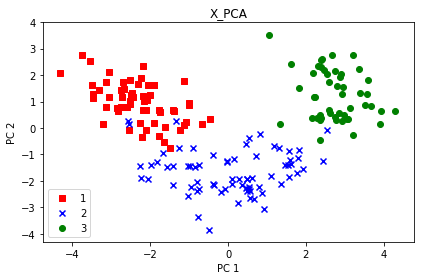

In [181]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for lab, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(W[y.values==lab, 0], 
                W[y.values==lab, 1], 
                c=c, label=lab, marker=m)

plt.title('X_PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

###  Building a model to test the model prediction using Eigen vectors

In [182]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(W, y, test_size=test_size, random_state=seed)

In [183]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.9814814814814815


C:\Users\212586743\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\212586743\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### With only 6 eigen vectors our model is able to predict the class with 98% accuracy